## What makes Small Island Developing States most vulnerable to climate change?

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
stats_data = pd.read_csv("data/question1_df.csv")
stats_data.head()

,iso,country,region,year,pop_total,pop_growth,gdp,imports,exports,avg_precip,co2,methane,nitrous_oxide,total_ghg,avg_temp_c,avg_temp_f
0,AFG,Afghanistan,South Asia,2000,20779953,2.975053,NaN,NaN,NaN,NaN,0.758,10.59,3.62,15.05,15.822667,60.48080
1,AFG,Afghanistan,South Asia,2001,21606988,3.902806,NaN,NaN,NaN,NaN,0.798,9.36,3.22,13.47,15.847917,60.52625
2,AFG,Afghanistan,South Asia,2002,22600770,4.496720,7.465115e+09,NaN,NaN,327.0,1.052,11.21,3.72,16.10,15.714583,60.28625
3,AFG,Afghanistan,South Asia,2003,23680871,4.668361,8.124454e+09,NaN,NaN,NaN,1.186,11.56,3.92,16.78,15.132583,59.23865
4,AFG,Afghanistan,South Asia,2004,24726684,4.321539,8.239344e+09,NaN,NaN,NaN,0.889,11.47,3.82,16.35,16.128417,61.03115


In [6]:
#identify countries by their unfccc negotiating parties
##small island developing states
sids = ['Bahrain', 'Cabo Verde', 'Comoros', 'Guinea-Bissau', 'Maldives', 'Mauritius', 
        'Sao Tomé and Principe', 'Seychelles', 'Singapore', 'Antigua and Barbuda', 
        'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica', 'Dominican Republic',
        'Grenada', 'Guyana', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 
        'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago',
        'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)',
        'Nauru', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Timor-Leste',
        'Tonga', 'Tuvalu', 'Vanuatu']
##least developed countries
ldc = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
       'Djibouti', 'Eritrea', 'Ethiopia', 'Gambia', 'Guinea', 'Guinea Bissau', 'Haiti', 'Kiribati',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda', 'Sao Tome and Principe', 
       'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 'Timor Leste', 
       'Togo', 'Tuvalu', 'Uganda', 'United Republic of Tanzania', 'Vanuatu', 'Yemen', 'Zambia']
##european union
eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 
      'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
      'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 
      'Slovenia', 'Spain', 'Sweden']
#organization of petroleum-exporting countries
opec = ['Algeria', 'Angola', 'Congo', 'Ecuador', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq', 
        'Kuwait', 'Libya', 'Nigeria', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Venezuela']

In [40]:
#subset to countries of interest
#picking one country to represent each special interest group and
#selecting the United States and China as well
countries_of_interest = ["United States", "China", "Germany", "Bangladesh", 
                         "Dominican Republic", "Saudi Arabia"]
stats_reduced = stats_data[stats_data['country'].isin(countries_of_interest)]
stats_reduced

,iso,country,region,year,pop_total,pop_growth,gdp,imports,exports,avg_precip,co2,methane,nitrous_oxide,total_ghg,avg_temp_c,avg_temp_f
42,BGD,Bangladesh,South Asia,2000,127657854,1.952387,6.701347e+10,6.403171e+09,6.588074e+09,NaN,26.525,69.01,21.38,136.20,25.905250,78.629450
43,BGD,Bangladesh,South Asia,2001,130088702,1.886287,7.041594e+10,7.225891e+09,7.227576e+09,NaN,31.035,69.16,21.90,140.36,25.931250,78.676250
44,BGD,Bangladesh,South Asia,2002,132478086,1.820070,7.311507e+10,6.875622e+09,6.791242e+09,2666.0,31.981,70.23,22.40,143.71,26.095000,78.971000
45,BGD,Bangladesh,South Asia,2003,134791603,1.731266,7.658041e+10,7.463456e+09,6.876857e+09,NaN,33.459,71.19,21.98,145.52,25.927417,78.669350
46,BGD,Bangladesh,South Asia,2004,136986432,1.615198,8.059286e+10,1.378870e+10,7.257330e+09,NaN,35.945,71.09,22.11,148.32,26.136083,79.044950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,USA,United States,North America,2009,306771529,0.876651,1.461730e+13,2.086299e+12,1.581996e+12,NaN,5491.036,679.85,246.01,5865.86,12.372389,54.270300
514,USA,United States,North America,2010,309321666,0.827846,1.499205e+13,2.360183e+12,1.846280e+12,NaN,5698.056,679.25,250.84,6111.81,13.020167,55.436300
515,USA,United States,North America,2011,311556874,0.720018,1.522455e+13,2.493194e+12,2.102995e+12,NaN,5565.294,670.49,261.57,6235.85,12.787111,55.016800
516,USA,United States,North America,2012,313830990,0.727269,1.556704e+13,2.560677e+12,2.191280e+12,715.0,5367.569,648.75,251.80,5936.09,13.960778,57.129400


In [8]:
#subset to year 2013
stats_2013 = stats_reduced[stats_reduced['year']==2013]
#fill in missing data
stats_2013 = stats_2013.replace(np.nan, 1949992*1000000) #comes from WITS (world integrated trade solution)
#select columns of interest
stats_2013_reduced = stats_2013[["country", "gdp", "imports", "exports"]]

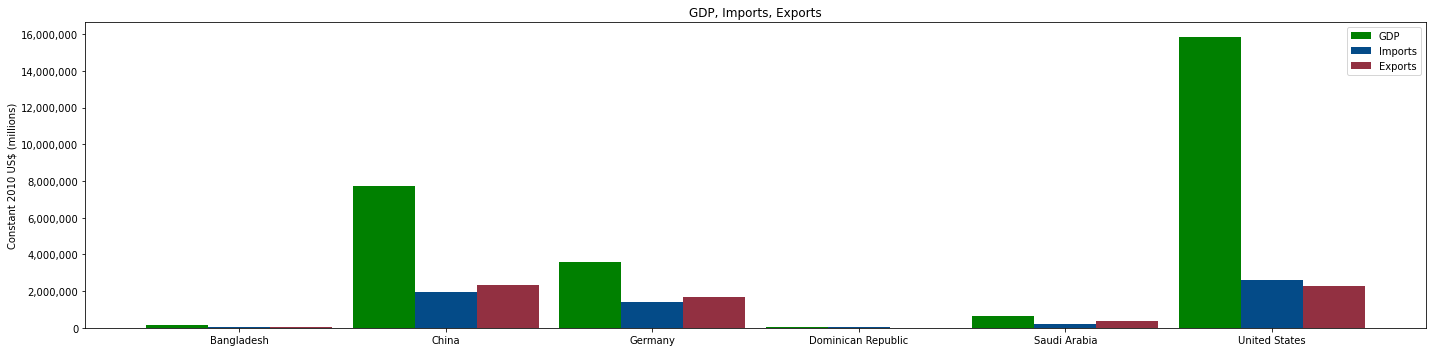

In [38]:
#grouped bar chart for gdp, imports, and exports in 2013
labels = stats_2013_reduced['country']
GDP = stats_2013_reduced['gdp']/1000000
Imports = stats_2013_reduced['imports']/1000000
Exports = stats_2013_reduced['exports']/1000000

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
y_tix = pd.Series(range(0, 18000000, 2000000)) #y-range
y_lbls = y_tix.apply(comma_format)  #y axis labels

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, GDP, width, label='GDP', color="green")
rects2 = ax.bar(x, Imports, width, label='Imports', color="#044B88")
rects3 = ax.bar(x + width, Exports, width, label='Exports', color="#923041")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constant 2010 US$ (millions)')
ax.set_title('GDP, Imports, Exports')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y_tix)
ax.set_yticklabels(y_lbls)
ax.legend()

fig.set_size_inches(20, 5)
fig.tight_layout()

plt.show()

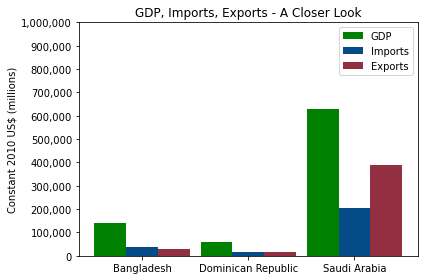

In [39]:
#taking a closer look at smaller countries
reduced_reduced = stats_2013_reduced[stats_2013_reduced['country'].isin(["Bangladesh", "Dominican Republic", "Saudi Arabia"])]
labels = reduced_reduced['country']
GDP = reduced_reduced['gdp']/1000000
Imports = reduced_reduced['imports']/1000000
Exports = reduced_reduced['exports']/1000000

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
y_tix = pd.Series(range(0, 1100000, 100000)) #y-range
y_lbls = y_tix.apply(comma_format)  #y axis labels

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, GDP, width, label='GDP', color="green")
rects2 = ax.bar(x, Imports, width, label='Imports', color="#044B88")
rects3 = ax.bar(x + width, Exports, width, label='Exports', color="#923041")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constant 2010 US$ (millions)')
ax.set_title('GDP, Imports, Exports - A Closer Look')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y_tix)
ax.set_yticklabels(y_lbls)
ax.legend()

fig.tight_layout()

plt.show()

In [11]:
#select climate change-related stats
climate_change_stats = stats_data[['country', 'year', 'co2', 'methane', 'nitrous_oxide', 'avg_temp_f']]
years = climate_change_stats['year'].unique()

fig, ax = plt.subplots(2,2)
ax.plot(x, years, label='United States', color="green")
ax.plot(x, years, label='China', color="#044B88")
ax.plot(x, years, label='United States', color="green")
ax.plot(x, years, label='China', color="#044B88")
ax.plot(x, years, label='United States', color="green")
ax.plot(x, years, label='China', color="#044B88")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constant 2010 US$ (millions)')
ax.set_title('GDP, Imports, Exports - A Closer Look')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(y_tix)
ax.set_yticklabels(y_lbls)
ax.legend()